In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/past-data-of-n50/NSEI.csv
/kaggle/input/nifty50-eda/FMCG.csv
/kaggle/input/nifty50-eda/Bank.csv
/kaggle/input/nifty50-eda/Healthcare.csv
/kaggle/input/nifty50-eda/Oil and Gas.csv
/kaggle/input/nifty50-eda/Financial Services.csv
/kaggle/input/nifty50-eda/Nifty 50.csv
/kaggle/input/nifty50-eda/PSU Bank.csv
/kaggle/input/nifty50-eda/Pharma.csv
/kaggle/input/nifty50-eda/Auto.csv
/kaggle/input/nifty50-eda/Media.csv
/kaggle/input/nifty50-eda/IT.csv
/kaggle/input/nifty50-eda/Realty.csv
/kaggle/input/nifty50-eda/Private Bank.csv
/kaggle/input/nifty50-eda/Cons Dur.csv
/kaggle/input/newnifty50/NIFTY_50.csv
/kaggle/input/niftsectors/NIFTY_METAL.csv
/kaggle/input/niftsectors/NIFTY_PHARMA.csv
/kaggle/input/niftsectors/NIFTY_IT.csv
/kaggle/input/niftsectors/NIFTY_AUTO.csv
/kaggle/input/niftsectors/NIFTY_FMCG.csv
/kaggle/input/niftsectors/NIFTY_BANK.csv


I would like to give due credits https://jovian.ai/kirti-gaurav8/nifty50-eda whose code and python NB I used to build this project on

# WHAT DO YOU MEAN BY NIFTY 50?
The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange.These stocks span across 12 sectors of the Indian economy which include – information technology, financial services, consumer goods, entertainment and media, financial services, metals, pharmaceuticals, telecommunications, cement and its products, automobiles, pesticides and fertilizers, energy, and other services. Apart from Nifty, Sensex is another such index that is used to understand the market behaviour.NIFTY 50 follows the trends and patterns of blue-chip companies.

# About the dataset being worked upon:
This data set has 14 files one of nifty50 index performance and other are respectively the sectoral trend. This data has been collected for a tenure of a year i.e from March 22 2020 to March 21 2021. The data has been collected from NSE website.

# Objective:
To analyse the shift in behaviour due to the pandemic and imposition of lockdown and the functionality of various sectors affected the Nifty's trend line.

Let's begin :D

# Importing data lib and data prep


In [50]:
import numpy as np
import pandas as pd
!pip install chart_studio --upgrade -q
!pip install cufflinks --upgrade -q
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from datetime import datetime


In [51]:
nifty_50 = pd.read_csv("../input/past-data-of-n50/NSEI.csv", parse_dates = ["Date"])

In [52]:
nifty_50.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100.0
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700.0
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800.0
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500.0
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800.0


In [53]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       305 non-null    datetime64[ns]
 1   Open       303 non-null    float64       
 2   High       303 non-null    float64       
 3   Low        303 non-null    float64       
 4   Close      303 non-null    float64       
 5   Adj Close  303 non-null    float64       
 6   Volume     303 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.8 KB


# What the columns mean here?

* The Open and Close columns indicate the opening and closing price of the stocks on a particular day.
* The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.
* The Volume tells the total volume of stocks traded on a particular day.
* The Turnover column refers to the total value of stocks traded during a specific period of time. 

# Data Cleaning
Checking missing values

In [54]:
nifty_50.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

There are no missing values. We will now import the Sectoral Datasets and clean them.

In [55]:
# Importing
nifty_auto = pd.read_csv("../input/niftsectors/NIFTY_AUTO.csv",parse_dates=["Date"])
nifty_bank = pd.read_csv("../input/niftsectors/NIFTY_BANK.csv",parse_dates=["Date"])
nifty_fmcg = pd.read_csv("../input/niftsectors/NIFTY_FMCG.csv",parse_dates=["Date"])
nifty_IT = pd.read_csv("../input/niftsectors/NIFTY_IT.csv",parse_dates=["Date"])
nifty_metal = pd.read_csv("../input/niftsectors/NIFTY_METAL.csv",parse_dates=["Date"])
nifty_pharma = pd.read_csv("../input/niftsectors/NIFTY_PHARMA.csv",parse_dates=["Date"])

# Cleaning
nifty_auto.fillna(method='pad',inplace=True)
nifty_bank.fillna(method='pad',inplace=True)
nifty_fmcg.fillna(method='pad',inplace=True)
nifty_IT.fillna(method='pad',inplace=True)
nifty_metal.fillna(method='pad',inplace=True)
nifty_pharma.fillna(method='pad',inplace=True)

# Visualisation
The data is ready to be visualised.

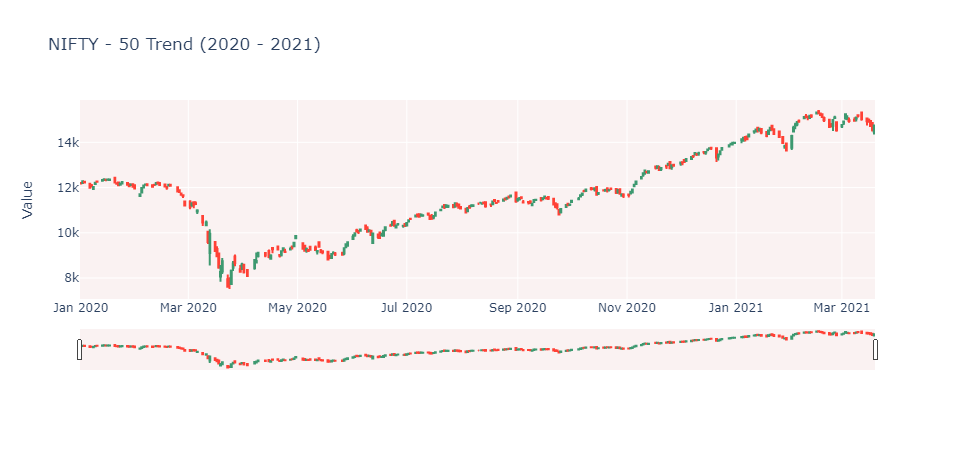

In [56]:
fig = go.Figure(data=[go.Candlestick(x=nifty_50['Date'],
                open=nifty_50['Open'],
                high=nifty_50['High'],
                low=nifty_50['Low'],
                close=nifty_50['Close'])])
fig.update_layout(title_text='NIFTY - 50 Trend (2020 - 2021)',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

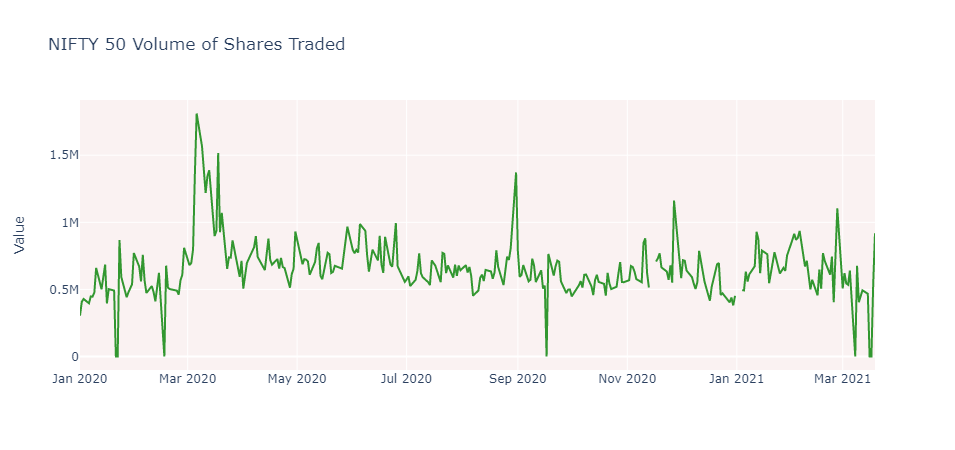

In [57]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50['Date'],
         y=nifty_50['Volume'],
         name='Shares Traded',
    line=dict(color='green'),
    opacity=0.8))
    
fig.update_layout(title_text='NIFTY 50 Volume of Shares Traded',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

# Analysis
We are going to study the impact of onset of the pandmic hence on.

* **March 23 2020** When the lockdown was announced.



In [58]:
nifty_hist = pd.read_csv("../input/past-data-of-n50/NSEI.csv",parse_dates=["Date"])

In [59]:
nifty_hist.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [60]:
nifty_hist.fillna(method = "pad", inplace = True) #Filling in the incomplete data 

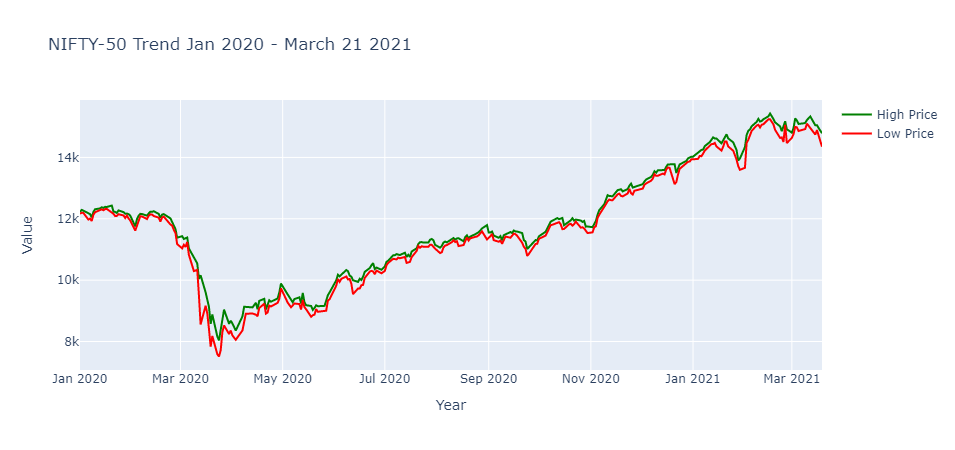

In [67]:
nifty_50_2019_2020 = nifty_hist[(nifty_hist['Date'] >= '2020-01-01')]
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty_50_2019_2020['Date'],
         y=nifty_50_2019_2020['High'],
         name='High Price',
    line=dict(color='green'),
    opacity=1))

fig.add_trace(go.Scatter(
         x=nifty_50_2019_2020['Date'],
         y=nifty_50_2019_2020['Low'],
         name='Low Price',
    line=dict(color='red'),
    opacity=1))
        
    
fig.update_layout(title_text="NIFTY-50 Trend Jan 2020 - March 21 2021",xaxis_title = 'Year', yaxis_title='Value')

fig.show()

There is a sharp fall in March 2020. This indciates that our hypothesis is true, i.e. indication of the beginning of lockdown.



# Relating events
* On **March 23 2020** - Announcement of Lockdown
* On **March 12 2020** - Pandemic Announced by WHO

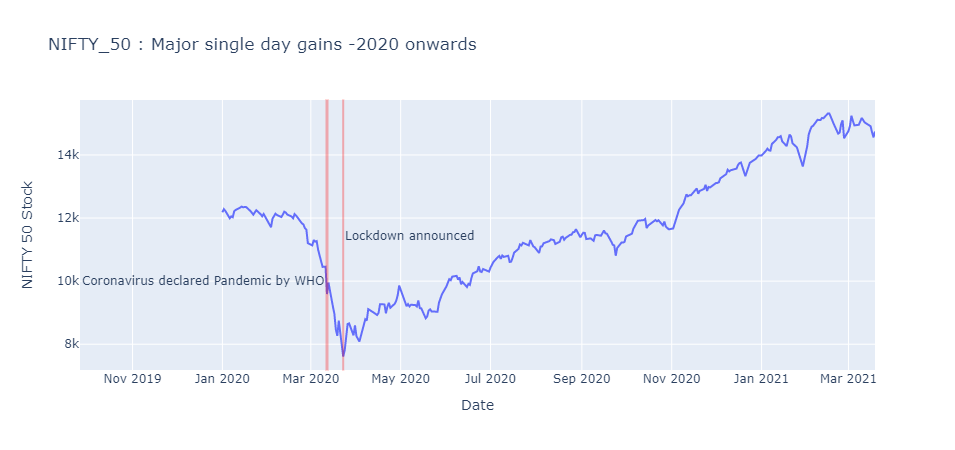

In [68]:
fig = px.line(nifty_50_2019_2020, x='Date', y='Close', title='Time Series')

fig.update_layout(title='NIFTY_50 : Major single day gains -2020 onwards',
    yaxis_title='NIFTY 50 Stock',
    shapes = [dict(x0='2020-03-23', x1='2020-03-23', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,line_color='red',editable=False),
              dict(x0='2020-03-12', x1='2020-03-12', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red')],
                annotations=[dict(x='2020-03-23', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Lockdown announced'),
                 dict(x='2020-03-12', y=0.3, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Coronavirus declared Pandemic by WHO')],                 
)
fig.show()

# Sectoral Perfomance Analysis
Combining the datsets

In [63]:
nifty_auto_2019 = nifty_auto[nifty_auto['Date'] > '2019-12-31']
nifty_bank_2019 = nifty_bank[nifty_bank['Date'] > '2019-12-31']
nifty_fmcg_2019 = nifty_fmcg[nifty_fmcg['Date'] > '2019-12-31']
nifty_IT_2019 = nifty_IT[nifty_IT['Date'] > '2019-12-31']
nifty_metal_2019 = nifty_metal[nifty_metal['Date'] > '2019-12-31']
nifty_pharma_2019 = nifty_pharma[nifty_pharma['Date'] > '2019-12-31']

data = {'NIFTY Auto index': nifty_auto_2019['Close'].values, 
        'NIFTY Bank index': nifty_bank_2019['Close'].values,
        'NIFTY FMCG index': nifty_fmcg_2019['Close'].values,
        'NIFTY IT index': nifty_IT_2019['Close'].values,
        'NIFTY Metal index': nifty_metal_2019['Close'].values,
        'NIFTY Pharma index': nifty_pharma_2019['Close'].values,
       }
df = pd.DataFrame(data=data)
df.index=nifty_auto_2019['Date']
df.head()

,NIFTY Auto index,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Metal index,NIFTY Pharma index
Date,,,,,,
2020-01-01,8210.10,32102.90,30234.25,15722.15,2796.05,8047.10
2020-01-02,8267.45,32443.85,30266.20,15709.65,2869.90,8053.95
2020-01-03,8168.15,32069.25,30109.25,15936.60,2848.35,8111.95
2020-01-06,7978.75,31237.15,29799.30,15879.80,2765.75,7987.35
2020-01-07,8002.50,31399.40,29861.80,15895.20,2785.90,8036.50


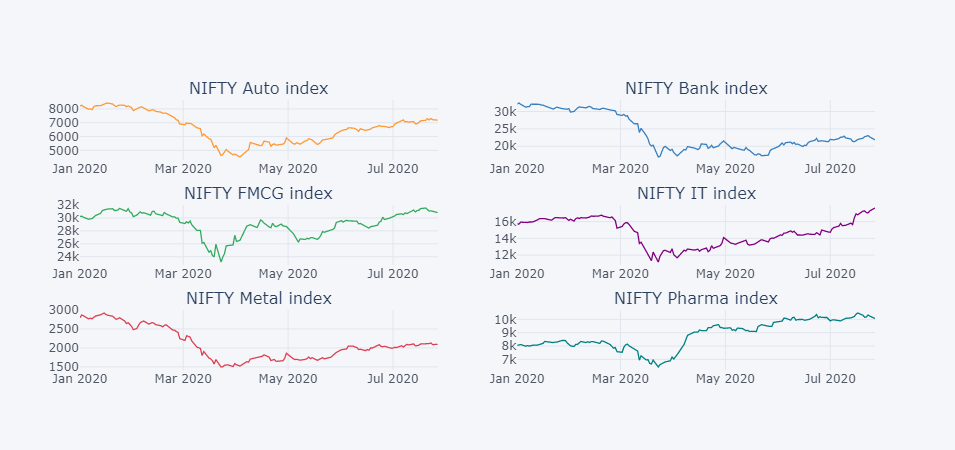

In [64]:
fig = df.iplot(asFigure=True, subplots=True, subplot_titles=True, legend=False)
fig.show()

The data has been plotted exactly from where it dipped. All the sectors saw a decline, but now slowly they have started rising again. Amongst all the sectors, we can clearly see Pharma, IT and FMCG are faring better than the others.
The dip would have been prominently visible had I plotted data from January of 2020.

In [65]:
nifty_IT_current = nifty_IT[nifty_IT['Date'] > '2019-12-31']['Turnover'].mean()
nifty_bank_current = nifty_bank[nifty_bank['Date'] > '2019-12-31']['Turnover'].mean()
nifty_auto_current = nifty_auto[nifty_auto['Date'] > '2019-12-31']['Turnover'].mean()
nifty_fmcg_current = nifty_fmcg[nifty_fmcg['Date'] > '2019-12-31']['Turnover'].mean()
nifty_metal_current = nifty_metal[nifty_metal['Date'] > '2019-12-31']['Turnover'].mean()
nifty_pharma_current = nifty_pharma[nifty_pharma['Date'] > '2019-12-31']['Turnover'].mean()

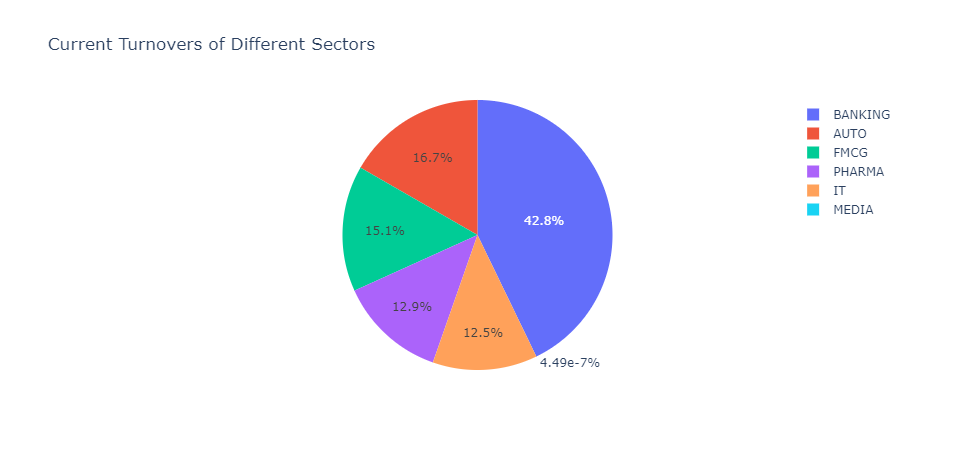

In [66]:
labels = ['IT','BANKING','AUTO','FMCG', 'MEDIA', 'PHARMA']
values = [nifty_IT_current, nifty_bank_current, nifty_auto_current, nifty_fmcg_current, nifty_media_current, nifty_pharma_current]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="Current Turnovers of Different Sectors")
fig.show()

# Inference and Conclusion
* The Covid- 19 pandemic did cause a change in the cyclical nature of the market but now the sectors are slowly recovering from the fall.
* Amongst all the sectors, IT and FMCG are faring better than the others (by reducing the deviations at most 5k). Pharma market is recovering and can be attributed to rowing demand for medicines and sanitizers.
* Comparing the sectors Turnover-wise,Banking leads followed by Auto and FMCG holding almost equal share.